Belfiore Asia, CID:02129867 \
MSc Advanced Computing, Spring Term, January 2025

# 1. **Analysis of Acute Kidney Injury (AKI) Data**
Explorative analysis of input data.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np
from utils import *

# 1. Load the training data
train_data_path = 'data/training.csv'
header_len = get_longest_row(train_data_path)
test_dates_columns = get_header(header_len, 'train')

creatinine_columns = test_dates_columns.copy()[3:]

train_data = pd.read_csv(train_data_path, sep=',', names=test_dates_columns, skiprows=1)

# get the exam date columns to datetime
exam_dates = {}
for i in range(0, len(creatinine_columns), 2):
    exam_dates[creatinine_columns[i]] = pd.to_datetime(train_data[creatinine_columns[i]])
    train_data[creatinine_columns[i]] = pd.to_datetime(train_data[creatinine_columns[i]])
    # train_data.drop(columns = creatinine_columns[i], inplace=True)

exam_dates = pd.DataFrame(exam_dates)

train_data

,age,sex,aki,creatinine_date_0,creatinine_result_0,creatinine_date_1,creatinine_result_1,creatinine_date_2,creatinine_result_2,creatinine_date_3,...,creatinine_date_39,creatinine_result_39,creatinine_date_40,creatinine_result_40,creatinine_date_41,creatinine_result_41,creatinine_date_42,creatinine_result_42,creatinine_date_43,creatinine_result_43
0,18,f,n,2024-01-01 07:54:00,102.56,2024-01-01 17:42:00,108.55,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,58,m,n,2024-01-01 10:39:00,125.00,2024-01-02 06:47:00,140.16,2024-01-02 07:10:00,145.98,2024-01-02 11:15:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,39,m,n,2024-01-01 14:26:00,187.44,2024-01-01 16:27:00,191.74,2024-01-09 10:46:00,197.47,2024-01-12 11:18:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,27,f,n,2024-01-01 16:05:00,141.85,2024-01-19 13:57:00,129.73,2024-09-21 05:57:00,132.16,2024-09-30 07:22:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,4,m,n,2024-01-01 16:17:00,72.29,2024-01-01 16:18:00,69.07,2024-01-05 10:54:00,72.91,2024-01-05 15:12:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,55,f,n,2025-03-31 15:10:00,151.55,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
7297,43,f,n,2025-03-31 15:27:00,128.80,2025-03-31 17:27:00,132.97,2025-03-31 17:46:00,109.05,2025-03-31 23:32:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
7298,26,f,n,2025-03-31 15:47:00,173.68,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
7299,31,f,y,2025-03-31 16:36:00,76.50,2025-03-31 17:57:00,152.99,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [10]:
exam_dates

,creatinine_date_0,creatinine_date_1,creatinine_date_2,creatinine_date_3,creatinine_date_4,creatinine_date_5,creatinine_date_6,creatinine_date_7,creatinine_date_8,creatinine_date_9,...,creatinine_date_34,creatinine_date_35,creatinine_date_36,creatinine_date_37,creatinine_date_38,creatinine_date_39,creatinine_date_40,creatinine_date_41,creatinine_date_42,creatinine_date_43
0,2024-01-01 07:54:00,2024-01-01 17:42:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2024-01-01 10:39:00,2024-01-02 06:47:00,2024-01-02 07:10:00,2024-01-02 11:15:00,2024-01-02 17:26:00,2024-01-26 17:33:00,2024-02-02 08:01:00,2024-02-02 16:58:00,2024-02-03 16:43:00,2024-02-03 22:24:00,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2024-01-01 14:26:00,2024-01-01 16:27:00,2024-01-09 10:46:00,2024-01-12 11:18:00,2024-08-19 14:39:00,2024-09-06 22:02:00,2024-09-23 12:04:00,2024-09-28 09:58:00,2024-09-28 11:15:00,2024-10-08 16:15:00,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2024-01-01 16:05:00,2024-01-19 13:57:00,2024-09-21 05:57:00,2024-09-30 07:22:00,2024-10-08 16:02:00,2024-10-18 09:57:00,2024-10-18 18:13:00,2024-10-18 20:12:00,2024-10-19 12:58:00,2024-10-19 15:37:00,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2024-01-01 16:17:00,2024-01-01 16:18:00,2024-01-05 10:54:00,2024-01-05 15:12:00,2024-01-07 18:35:00,2024-01-15 08:35:00,2024-01-21 19:05:00,2024-01-23 07:09:00,2024-09-11 16:06:00,2024-09-11 16:16:00,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,2025-03-31 15:10:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7297,2025-03-31 15:27:00,2025-03-31 17:27:00,2025-03-31 17:46:00,2025-03-31 23:32:00,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7298,2025-03-31 15:47:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7299,2025-03-31 16:36:00,2025-03-31 17:57:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


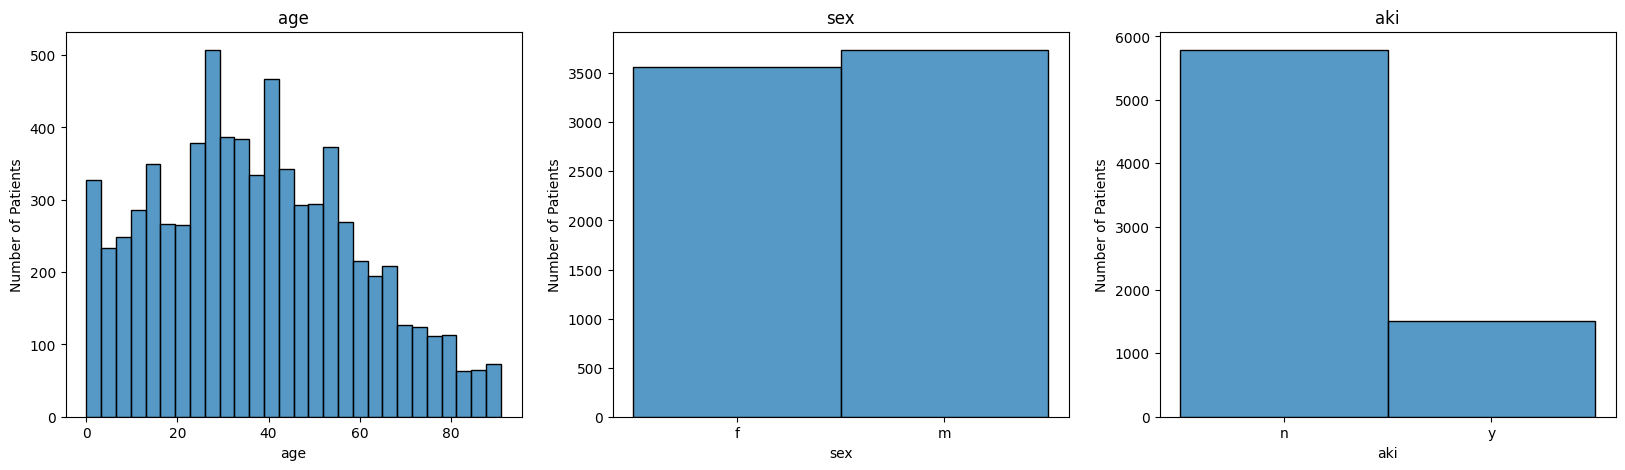

In [11]:
# 1.1 Print some statistics about the data
fig, axes = plt.subplots(figsize=(20,5), ncols=3)

for i,col in enumerate(['age', 'sex', 'aki']):
    # plot the change in creatinine levels of the patient over time
    # train_data[col].plot(ax=axes[0,i])
    sns.histplot(data=train_data, x=col, ax=axes[i])
    axes[i].set_ylabel("Number of Patients")
    axes[i].set_title(f"{col}")

/var/folders/vr/t_3rc9l16fzfc__65h566qhw0000gn/T/ipykernel_607/2270942159.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


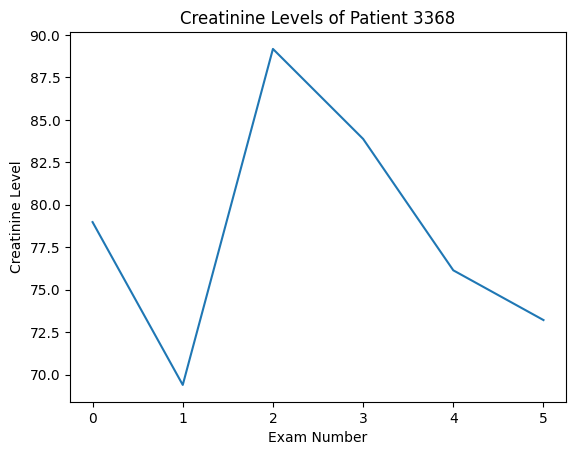

In [ ]:
# 1.2 Analysis of Creatinine Levels
def get_cols(num):
    return [f'creatinine_date_{i}' for i in range(num)]

# Plot Creatinine Levels of a Random Patient
def plot_patient_creatinine(patient):
    fig, ax = plt.subplots()

    # adjust the x-axis labels based on how many tests this patient has taken
    labels = [index for index in range(len(ax.get_xticklabels()))]
    ax.set_xticklabels(labels)

    # plot the change in creatinine levels of the patient over time
    plt.plot(plot_data.iloc[patient])
    plt.xlabel('Exam Number')
    plt.ylabel('Creatinine Level')
    plt.title(f'Creatinine Levels of Patient {patient+1}')

plot_data = train_data.copy()
plot_data.drop(columns=get_cols((get_longest_row(train_data_path)-2)//2), inplace=True)
plot_data.drop(columns=['age', 'sex', 'aki'], inplace=True)
plot_patient_creatinine(np.random.randint(0, plot_data.shape[0]))

In [13]:
# 1.3 Map the aki and sex columns to binary
train_data['aki'] = train_data['aki'].apply(lambda patient_record: to_binary(patient_record, 'y'))
train_data['sex'] = train_data['sex'].apply(lambda patient_record: to_binary(patient_record, 'f'))
train_data

,age,sex,aki,creatinine_date_0,creatinine_result_0,creatinine_date_1,creatinine_result_1,creatinine_date_2,creatinine_result_2,creatinine_date_3,...,creatinine_date_39,creatinine_result_39,creatinine_date_40,creatinine_result_40,creatinine_date_41,creatinine_result_41,creatinine_date_42,creatinine_result_42,creatinine_date_43,creatinine_result_43
0,18,1,0,2024-01-01 07:54:00,102.56,2024-01-01 17:42:00,108.55,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,58,0,0,2024-01-01 10:39:00,125.00,2024-01-02 06:47:00,140.16,2024-01-02 07:10:00,145.98,2024-01-02 11:15:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,39,0,0,2024-01-01 14:26:00,187.44,2024-01-01 16:27:00,191.74,2024-01-09 10:46:00,197.47,2024-01-12 11:18:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,27,1,0,2024-01-01 16:05:00,141.85,2024-01-19 13:57:00,129.73,2024-09-21 05:57:00,132.16,2024-09-30 07:22:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,4,0,0,2024-01-01 16:17:00,72.29,2024-01-01 16:18:00,69.07,2024-01-05 10:54:00,72.91,2024-01-05 15:12:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,55,1,0,2025-03-31 15:10:00,151.55,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
7297,43,1,0,2025-03-31 15:27:00,128.80,2025-03-31 17:27:00,132.97,2025-03-31 17:46:00,109.05,2025-03-31 23:32:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
7298,26,1,0,2025-03-31 15:47:00,173.68,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
7299,31,1,1,2025-03-31 16:36:00,76.50,2025-03-31 17:57:00,152.99,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [15]:
# 1.4 Calculate minimum, average and maximum creatinine levels for each patient
creatine_columns = ['creatinine_result_0', 'creatinine_result_1', 'creatinine_result_2', 'creatinine_result_3', 'creatinine_result_4', 
                    'creatinine_result_5', 'creatinine_result_6', 'creatinine_result_7', 'creatinine_result_8',]
creatinine_stats = {}
creatinine_stats['min_creatinine'] = train_data.loc[:][creatine_columns].min(axis=1)
creatinine_stats['avg_creatinine'] = train_data.loc[:][creatine_columns].median(axis=1)
creatinine_stats['max_creatinine'] = train_data.loc[:][creatine_columns].max(axis=1)

creatine_ds = pd.DataFrame(creatinine_stats)
creatine_ds

,min_creatinine,avg_creatinine,max_creatinine
0,102.56,105.555,108.55
1,104.46,127.410,145.98
2,174.60,205.250,228.92
3,98.72,127.760,141.85
4,59.38,72.910,76.32
...,...,...,...
7296,151.55,151.550,151.55
7297,109.05,130.885,133.05
7298,173.68,173.680,173.68
7299,76.50,114.745,152.99


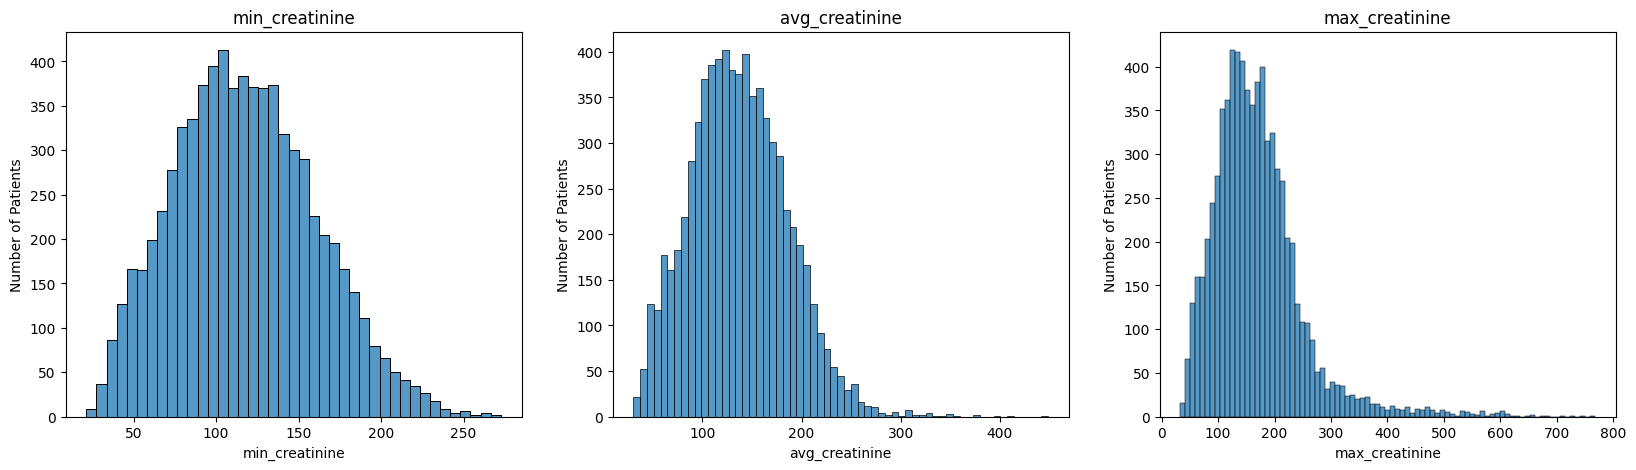

In [17]:
# 1.5 Print statistics about creatininge levels
fig, axes = plt.subplots(figsize=(20,5), ncols=3)

for i,col in enumerate(['min_creatinine', 'avg_creatinine', 'max_creatinine']):
    sns.histplot(data=creatine_ds, x=col, ax=axes[i])
    axes[i].set_ylabel("Number of Patients")
    axes[i].set_title(f"{col}")

# 2. **Comparison of ML model performance vs NHS algorithm**

In [1]:
import numpy as np  # add to requirements.txt
from utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
from sklearn.linear_model import SGDClassifier # add to requirements.txt

# 0. Define Local Data Paths
train_data_path = 'data/training.csv'
test_data_path = 'data/test.csv'

def plot_accuracy(data_type, model, y_true, model_name, f3_score):
    """
        Plot the accuracy of the given model compared to the real
        distribution of the data.

        input:
            - model: the model to be plotted
            - y_true: the true distribution of the data
            - model_name: the name of the model
            - f3_score: the pre-calculated f3 score of the model
    """
    fig, ax = plt.subplots()
    plt.hist(model, color='g', alpha=0.4, label=model_name)
    plt.hist(y_true, color='r', alpha=1, histtype='step', label='True Diagnosis')
    plt.title(f"{data_type} accuracy of {model_name} with F3 Score: {f3_score}")
    plt.xlabel(f'{model_name} Diagnosis')
    plt.ylabel('Number of Patients')
    plt.legend()

def nhs_aki_algo(patient):
    """
        Predict AKI presence using the NHS algorithm.

        input:
            - model: the model to be plotted
            - y_true: the true distribution of the data
            - model_name: the name of the model
            - f3_score: the pre-calculated f3 score of the model
    """

    def get_reference_interval(sex, age):
        """
            Return the Population Reference Interval (RI) based on age and sex of patient.
            source: https://www.thinkkidneys.nhs.uk/aki/wp-content/uploads/sites/2/2016/05/Guidance-for-paediatric-patients-FINAL-1017.pdf
        """
        if age > 16:
            if sex == 'm': return (59, 104)
            else: return (45, 84)
        elif age == 16: 
            if sex == 'm': return (54, 99)
            else: return (48, 81)
        elif age == 15: 
            if sex == 'm': return (47, 98)
            else: return (44, 79)
        elif age == 14: 
            if sex == 'm': return (40, 83)
            else: return (43, 75)
        elif age == 13: 
            if sex == 'm': return (38, 76)
            else: return (38, 74)
        elif age == 12: return (36, 67)
        elif age == 11: return (36, 64)
        elif 9 <= age < 11: return (28, 57)
        elif 7 <= age < 9: return (30, 48)
        elif 5 <= age < 7: return (25, 42)
        elif 3 <= age < 5: return (23, 37)
        elif 1 <= age < 3: return (15, 31)
        elif age < 1: return (14, 81)

    [sex, age, c1, rv1, rv2, rv_ratio, D] = patient
    # (low_ri, high_ri) = get_reference_interval(sex, age)
    if rv_ratio >= 1.5:
        return 1
    elif D > 26:
        return 1
    else:
        return 0

(7301, 7) (7301,)
(7402, 7) (7402,)
SGDClassifier(max_iter=100) 
41 wrong predictions out of 7402
F3 Score: 0.98304
------------ Model satisfies performance requirements with F3: 0.98304 ------------ 


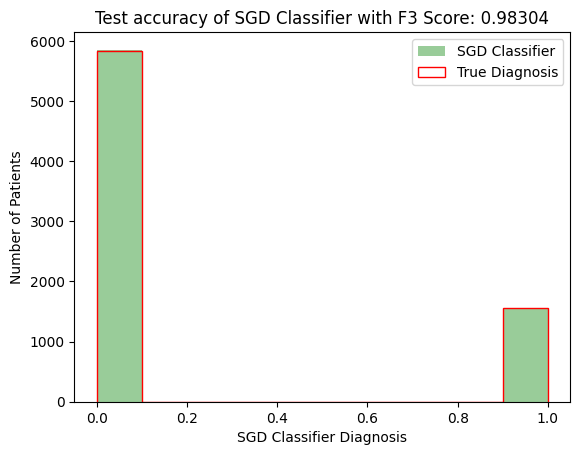

In [3]:
# 1. Load Training and Testing Datasets
train_data = prepare_train_data('data/training.csv')
test_data = prepare_train_data('data/test.csv')
train_data.shape, test_data.shape

# 2. Prepare Data
X_train = train_data.loc[:,'sex':'D']
Y_train = train_data.loc[:,'aki']
print(X_train.shape, Y_train.shape)

X_test = test_data.loc[:,'sex':'D']
Y_test = test_data.loc[:,'aki']
print(X_test.shape, Y_test.shape)

# 2. Define Model
# model_aki = sklearn.naive_bayes.GaussianNB()
model_aki = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

# 3. Train Model
model_aki.fit(X_train.values, Y_train.values)

# 4. Evaluate Model
y_pred = model_aki.predict(X_test.values)
print(model_aki, f"\n{(Y_test != y_pred).sum()} wrong predictions out of {X_test.shape[0]}")

# 4.a Compute F3 Score
model_f3 = fbeta_score(Y_test, y_pred, beta=3)
print("F3 Score:", model_f3)
if model_f3 < 0.7:
    print(f"------------ Model has UNSATISFACTORY performance {model_f3} ------------ ")
else:
    print(f"------------ Model satisfies performance requirements with F3: {model_f3} ------------ ")
# 4.b. Plot Model Accuracy
plot_accuracy('Test', y_pred, Y_test, 'SGD Classifier', model_f3)

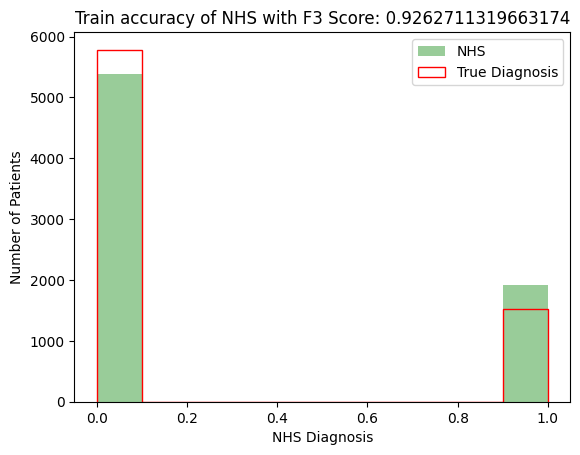

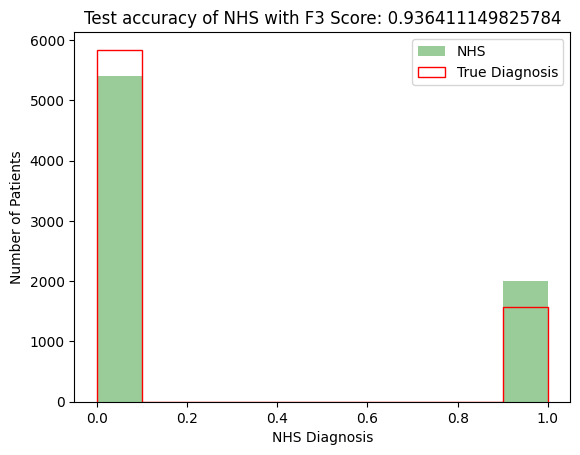

In [8]:
# 5 Compare to NHS algorithm
# 5.a NHS Train Dataset Prediction 
nhs_aki = [nhs_aki_algo(row.tolist()) for i,row in X_train.iterrows()]
nhs_f3 = fbeta_score(Y_train, np.array(nhs_aki), beta=3)
# 5.b Plot Train Prediction Accuracy
plot_accuracy('Train', nhs_aki, Y_train, 'NHS', nhs_f3)
# 5.c NHS Test Dataset Prediction 
nhs_test_aki = [nhs_aki_algo(row.tolist()) for i,row in X_test.iterrows()]
nhs_f3 = fbeta_score(Y_test, nhs_test_aki, beta=3)
# 5.d Plot Test Prediction Accuracy
plot_accuracy('Test', nhs_test_aki, Y_test, 'NHS', nhs_f3)